### 2. Nichtlineare Gleichungssysteme mit Anwendungen

#### 2.1 Beispiel von der anwendung von <code>nonlinsolve()</code>

In [3]:
from sympy import *
init_printing()
x,y=symbols("x y")

In [11]:
system=[x*y-1,4*x**2+y**2-5];
symbols=[x,y]

system

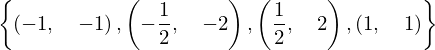

In [20]:
r=nonlinsolve(system,symbols)
r

Überprüfung:

In [35]:
(system[1].subs(x,list(r)[0][0]).subs(y,list(r)[0][1])==0)&(system[0].subs(x,list(r)[0][0]).subs(y,list(r)[0][1])==0)

True

#### 2.2 Rohrleitungssysteme

In [47]:
from sympy import *
q1,q2,q3=symbols("q1 q2 q3",real=True)
s=[q1+q3-70/3600,
   q3+q2-40/3600,
   30/3600+q2-q1
]
symbols=[q1,q2,q3]
nonlinsolve(s,symbols)

In [48]:
l1=250;l2=150;l3=200;
dm=0.08;l=0.022;

In [49]:
a1=l*l1/dm**5;
a2=l*l2/dm**5;
a3=l*l3/dm**5;


In [50]:
ss=[q1+q3-70/3600,
   q3+q2-40/3600,
   a1*(-q1)*Abs(q1)+a2*q2*Abs(q2)+a3*q3*Abs(q3)]
#30/3600+q2-q1,
ssymbols=[q1,q2,q3]

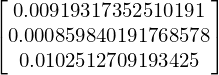

In [51]:
res=nsolve(ss,ssymbols,[1,1,1])
#solveset(ss,ssymbols)
#nonlinsolve(ss,ssymbols)
res

In [41]:
#ss[2].evalf(subs={q1:res[0],q2:res[1],q3:[2]})
#ss[1].evalf(subs={q2:res[1],q3:res[2]})
res[0]+res[2]==70/3600
#ss[0].evalf(subs={q1:res[0],q3:res[2]})
#ss[0].evalf(subs={q1:0.00919317352510191, q3:0.0102512709193425})
ex=ss[2].subs(q1,res[0])
ex=ex.subs(q2,res[1])
ex=ex.subs(q3,res[2])
ex


With implied lambda:

In [42]:
from sympy import *
q1,q2,q3,la1,la2,la3=symbols("q1 q2 q3 la1 la2 la3",real=True)

l1=250;l2=150;l3=200;
dm=0.08;
v=10**(-6);
k=0.00005;

a1=la1*l1/dm**5;
a2=la2*l2/dm**5;
a3=la3*l3/dm**5;

k1=q1+q3-70/3600;
k2=q3+q2-40/3600;
m=a1*(-q1)*Abs(q1)+a2*q2*Abs(q2)+a3*q3*Abs(q3);

Re1=(4*Abs(q1))/(pi*dm*v);

ins1=(
    (2.51/
     (Re1*sqrt(la1))
    ) +
    k/(3.71*dm)
)
    
zg1 = (1/sqrt(la1))+2*log(ins1,10);

zg2=zg1.subs(la1,la2);
zg2=zg2.subs(q1,q2);

zg3=zg1.subs(la1,la3);
zg3=zg3.subs(q1,q3);



In [43]:
symbols=[q1,q2,q3,la1,la2,la3]
eqs=[k1,k2,m,zg1,zg2,zg3]
values=[0.01,0.001,0.01,0.022,0.022,0.022]

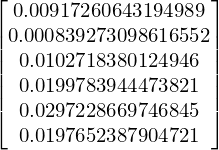

In [44]:
rn=nsolve(eqs,symbols,values)
rn

In [45]:
zgg=zg3.subs(q3,rn[2])
zgg=zgg.subs(la3,rn[5])
zgg.evalf()

#### Now a new exercise.
##### Firstly, let's try the Ü a)  Calculate it explicitly.
# Not working

In [143]:
from sympy import *
q1,q2,q3,q4,q5=symbols("q1 q2 q3 q4 q5",real=True)
l1=100;l2=200;l3=250; l4=180;l5=150;
dm=0.08;l=0.022;

a1=l*l1/dm**5;
a2=l*l2/dm**5;
a3=l*l3/dm**5;
a4=l*l4/dm**5;
a5=l*l5/dm**5;


In [144]:
ss=[q2+q5-90/3600,
    q2-20/3600-q1-q3,
    q5+q3-q4-30/3600,
    q1+q4-40/3600,
    a2*q2*Abs(q2)+a3*q3*Abs(q3)-a5*q5*Abs(q5),
    a4*q4*Abs(q4)+a3*q3*Abs(q3)-a1*q1*Abs(q1)
   ]
#30/3600+q2-q1,
ssymbols=[q1,q2,q3,q4,q5]

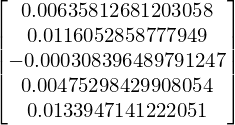

In [147]:
#nsolve(ss,ssymbols,[0.1,0.1,0.1,0.1,0.1])
#solveset(ss,ssymbols)
#nonlinsolve(ss,ssymbols)

res=nsolve(ss,ssymbols,[0.1,0.1,0.1,0.1,0.1])
res

In [146]:
ex=ss[5];
ex=ex.subs(q1,res[0])
ex=ex.subs(q3,res[2])
ex=ex.subs(q4,res[3])
ex

In [162]:
from sympy import *
q1,q2,q3,q4,q5,la1,la2,la3,la4,la5=symbols("q1 q2 q3 q4 q5 la1 la2 la3 la4 la5",real=True)

from sympy import *
l1=100;l2=200;l3=250;l4=180;l5=150;
dm=0.08;l=0.022;
v=10**(-6);
k=0.00005;

a1=la1*l1/dm**5;
a2=la2*l2/dm**5;
a3=la3*l3/dm**5;
a4=la4*l4/dm**5;
a5=la5*l5/dm**5;

Re1=(4*Abs(q1))/(pi*dm*v);

ins1=(
    (2.51/
     (Re1*sqrt(la1))
    ) +
    k/(3.71*dm)
)
    
zg1 = (1/sqrt(la1))+2*log(ins1,10);

zg2=zg1.subs(la1,la2);
zg2=zg2.subs(q1,q2);

zg3=zg1.subs(la1,la3);
zg3=zg3.subs(q1,q3);

zg4=zg1.subs(la1,la4);
zg4=zg4.subs(q1,q4);

zg5=zg1.subs(la1,la5);
zg5=zg5.subs(q1,q5);

ss=[q2+q5-90/3600,
    q2-20/3600-q1-q3,
    q5+q3-q4-30/3600,
    q1+q4-40/3600,
    a2*q2*Abs(q2)+a3*q3*Abs(q3)-a5*q5*Abs(q5),
    a4*q4*Abs(q4)+a3*q3*Abs(q3)-a1*q1*Abs(q1),
    
    zg1, zg2, zg3, zg4, zg5]

In [163]:
symbols=[q1,q2,q3,q4,q5,la1,la2,la3,la4,la5]
eqs=ss;
values=[0.01,0.01,0.01,0.01,0.01,
        0.022,0.022,0.022,0.022,0.022]

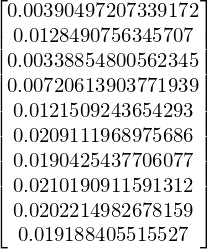

In [164]:
res = nsolve(eqs,symbols,values,tol=10000)
res

In [165]:
ex=ss[4];
ex=ex.subs(q1,res[0])
ex=ex.subs(q2,res[1])
ex=ex.subs(q3,res[2])
ex=ex.subs(q4,res[3])
ex=ex.subs(q5,res[4])
ex=ex.subs(la1,res[5])
ex=ex.subs(la2,res[6])
ex=ex.subs(la3,res[7])
ex=ex.subs(la4,res[8])
ex=ex.subs(la5,res[9])
ex.evalf()

In [23]:
x**(-1/2)

In [24]:
x**(-1/2)==1/x**(1/2)

True